# Using Keras with backend TensorFlow

Text(0.5,1,'Ground truth: 1')

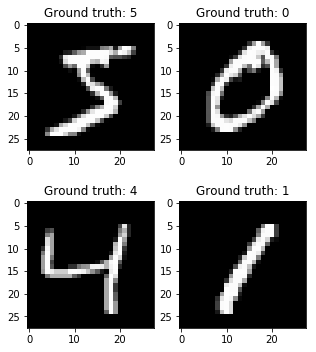

In [1]:
%matplotlib inline
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale (มี 1 channel มีค่าแต่ละ pixel 0-255)
plt.figure(1,figsize=[5,6])
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.title("Ground truth: %d"% y_train[0])
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.title("Ground truth: %d"% y_train[1])
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.title("Ground truth: %d"% y_train[2])
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.title("Ground truth: %d"% y_train[3])
# show the plot

In [2]:
# import class function
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

epochs = 20 
batch_size = 128 


In [3]:
# fix random seed for reproducibility
#seed = 7
#np.random.seed(seed)
(X_train, y_train_label), (X_test, y_test_label) = mnist.load_data()
# flatten 28*28 images to a 784 vector (pixels) for each image
# X_train.shape[1] = image_width, X_train.shape[2] = image_height
num_pixels = X_train.shape[1] * X_train.shape[2]
#print(X_train.shape[1],'*', X_train.shape[2], '=',num_pixels)
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train_label)
y_test = keras.utils.to_categorical(y_test_label)

num_classes = y_test.shape[1]  # จำนวนตัวเลข 10 classes
print('A number of classes:', num_classes)
print('Original label of y_test_label[0]: %d'%y_test_label[0])
print('After convert to one-hot of y_test[0]: ',y_test[0])

X_train shape: (60000, 784)
60000 train samples
10000 test samples
A number of classes: 10
Original label of y_test_label[0]: 7
After convert to one-hot of y_test[0]:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [15]:
# define model
def mlp_model1():
    # create model
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_pixels,)))
#    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
#    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    # print model
    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    return model

# regulization by using dropout
def mlp_model2():
    # create model
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(num_pixels,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    # print model
    model.summary()
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
    return model

# Check overfitting
def plotGraph(history):
    #Plot the Loss Curves
    plt.figure(figsize=[12,4])
    plt.subplot(121)
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
    plt.xlabel('Epochs ',fontsize=12)
    plt.ylabel('Loss',fontsize=12)
    plt.title('Loss Curves',fontsize=12)
 
    #Plot the Accuracy Curves
    plt.subplot(122)
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
    plt.xlabel('Epochs ',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.title('Accuracy Curves',fontsize=12)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.2178 - acc: 0.9333 - val_loss: 0.1080 - val_acc: 0.9670
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0810 - acc: 0.9747 - val_loss: 0.0905 - val_acc: 0.9715
Epoch 3/20
60000/60000 [==============================] - 1s 25us/step - los

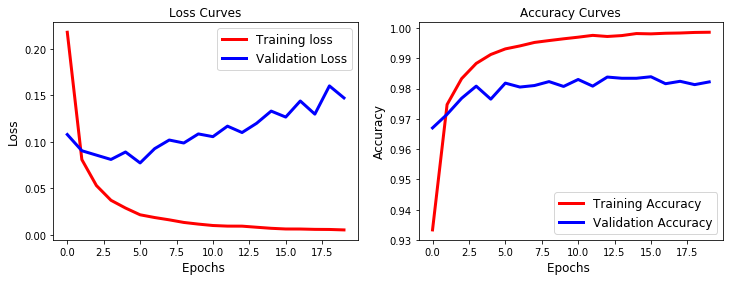

In [16]:
model = mlp_model1()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss: %.2f%%' % (100-scores[0]*100))
print('Test accuracy: %.2f%%' % (100-scores[1]*100))
plotGraph(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.2490 

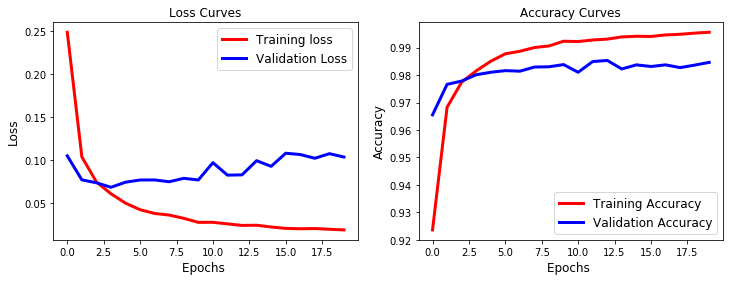

In [17]:
model = mlp_model2()
# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print('Test loss: %.2f%%' % (100-scores[0]*100))
print('Test accuracy: %.2f%%' % (100-scores[1]*100))
plotGraph(history)

In [21]:
model.predict(X_test[[0],:])

array([[2.8959120e-32, 4.1741066e-25, 1.9754553e-20, 4.2366674e-19,
        1.9561500e-38, 1.0402621e-26, 0.0000000e+00, 1.0000000e+00,
        3.1725290e-31, 5.2987668e-20]], dtype=float32)